In [197]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from keras.utils import to_categorical
from keras.datasets import cifar10
from keras.optimizers import Adam
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np

In [198]:
(x_train,y_train), (x_test, y_test) = cifar10.load_data()

In [199]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog',
               'frog', 'horse', 'ship', 'truck']

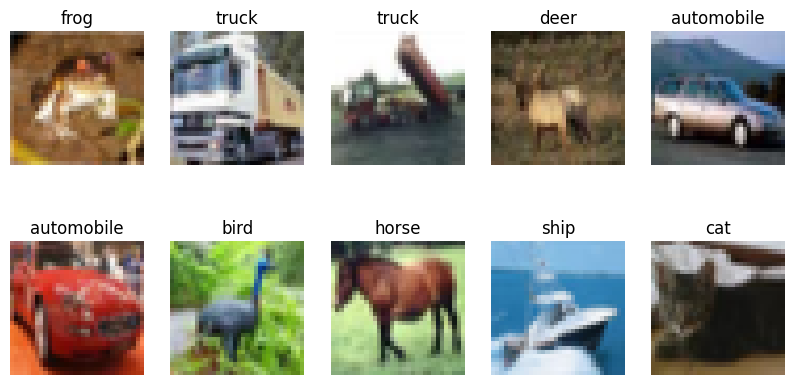

In [200]:
fig, axes = plt.subplots(2, 5, figsize=(10, 5))

# Iterate through the first 10 images
for i, ax in enumerate(axes.flat):
    # Select the image and label
    image, label = x_train[i], y_train[i]

    #Display the image
    ax.imshow(image, cmap='gray')

    #Set the title with the class label
    ax.set_title(f"{class_names[label.item()]}")
    ax.axis('off')

# Display the figure
plt.show()


In [201]:
# Normalize pixel value to be between 0 and 1
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

In [202]:
# Convert class vectors to binary class metrics / one-hot encoding
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

In [203]:
y_train[0]

array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0.])

In [204]:
y_train[1]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.])

### Define CNN Architecture

In [205]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# Define the CNN Model
model = Sequential()

# Conv2D Layer 1
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3), padding='same'))
model.add(MaxPooling2D((2, 2)))  # Output: 16x16x32

# Conv2D Layer 2
model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D((2, 2)))  # Output: 8x8x64

# Conv2D Layer 3
model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D((2, 2)))  # Output: 4x4x128

# Conv2D Layer 4
model.add(Conv2D(256, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D((2, 2)))  # Output: 2x2x256

# **Optional: Add Dropout to Reduce Overfitting**
model.add(Dropout(0.25))

# Flatten Layer
model.add(Flatten())  # Output: 1024 neurons

# Fully Connected Layers (More Layers Added)
model.add(Dense(512, activation='relu'))
model.add(Dense(512, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(32, activation='relu'))

# Output Layer
model.add(Dense(10, activation='softmax'))  # 10 classes for classification

# Model Summary
model.summary()


Model: "sequential_17"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_107 (Conv2D)                  │ (None, 32, 32, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_69 (MaxPooling2D)      │ (None, 16, 16, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_108 (Conv2D)                  │ (None, 16, 16, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_70 (MaxPooling2D)      │ (None, 8, 8, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_109 (Conv2D)                  │ (None, 8, 8, 128)           │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_71 (MaxPooling2D)      │ (None, 4, 4, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_110 (Conv2D)                  │ (None, 4, 4, 256)           │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_72 (MaxPooling2D)      │ (None, 2, 2, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 2, 2, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 1024)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_161 (Dense)                    │ (None, 512)                 │         524,800 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_162 (Dense)                    │ (None, 512)                 │         262,656 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_163 (Dense)                    │ (None, 256)                 │         131,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_164 (Dense)                    │ (None, 256)                 │          65,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_165 (Dense)                    │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_166 (Dense)                    │ (None, 128)                 │          16,512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_167 (Dense)                    │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_168 (Dense)                    │ (None, 64)                  │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_169 (Dense)                    │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_170 (Dense)                    │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_171 (Dense)                    │ (None, 10)                  │             330 │
└──────────────────────────────────────┴─────────────────────────────┴──────────────

 Total params: 1,438,282 (5.49 MB)

 Trainable params: 1,438,282 (5.49 MB)

 Non-trainable params: 0 (0.00 B)

In [206]:
# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [207]:
model.fit(x_train, y_train, batch_size=64, epochs=50,
          validation_data=(x_test, y_test))

Epoch 1/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 16s 12ms/step - accuracy: 0.1094 - loss: 2.2740 - val_accuracy: 0.2097 - val_loss: 1.8851
Epoch 2/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 13s 6ms/step - accuracy: 0.2143 - loss: 1.8757 - val_accuracy: 0.2917 - val_loss: 1.7363
Epoch 3/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.3107 - loss: 1.6913 - val_accuracy: 0.4654 - val_loss: 1.3995
Epoch 4/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.4835 - loss: 1.3567 - val_accuracy: 0.5381 - val_loss: 1.2560
Epoch 5/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.5680 - loss: 1.1908 - val_accuracy: 0.5726 - val_loss: 1.2141
Epoch 6/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.6155 - loss: 1.0791 - val_accuracy: 0.6356 - val_loss: 1.0507
Epoch 7/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.6543 - loss: 0.9952 - val_accuracy: 0.6267 - val_loss: 1.0583
Epoch 8/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.6788 - loss: 0.9286 - val_accuracy

In [208]:
loss, accuracy = model.evaluate(x_test, y_test)
print('Test Accuracy :', (accuracy * 100))

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7465 - loss: 1.1275
Test Accuracy : 74.1599977016449


In [209]:
pred = model.predict(x_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step


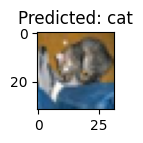

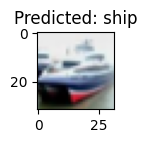

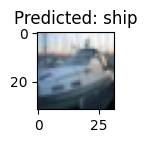

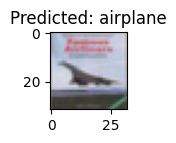

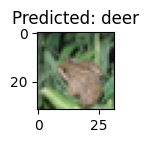

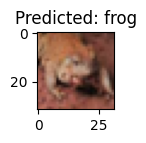

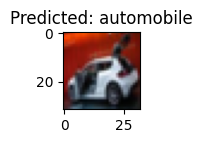

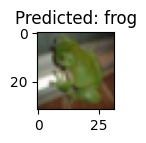

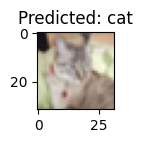

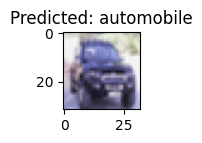

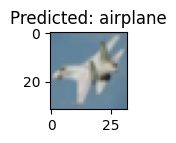

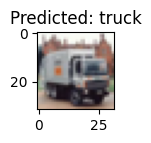

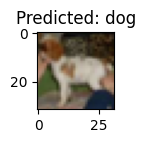

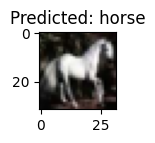

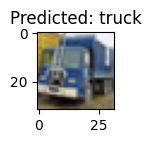

In [210]:
for i in range(15):
    plt.figure(figsize=(1,1))
    plt.imshow(x_test[i])
    plt.title(f'Predicted: {class_names[pred[i].argmax()]}')